<a href="https://colab.research.google.com/github/LaloDN/Submarine-sonar-prediction/blob/master/Submarine_sonar_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color="blue"> Submarine sonar prediction </font>

Submarines use a sonar technique while navigating to detect underwater objects, in this project we're taking the sonar's data which detected rocks and mines to predict if a submarine faces either a rock or a mine underwater.

## <font color="green"> First phase: pre-settings

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#First we load our dataset
from google.colab import drive, userdata
drive.mount('/content/drive')
route = userdata.get('driveRoute')
sonar_dataset = pd.read_csv(route,header=None)

Mounted at /content/drive


##  <font color="green"> Second phase: Analizing the data </font>


In [4]:
sonar_dataset

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In this data set our columns doesn't have any names, it seems that all the data are just float numbers and we can see our target column (60) which it has two values: R and M (rock and mines respectively)

In [5]:
separator = "\n================================================="
print('Columns:')
print(sonar_dataset.columns)
print(separator)
print('\nDatashape dimenssions:')
print(sonar_dataset.shape)
print(separator)
print('\nColumn Dtypes:')
print(sonar_dataset.dtypes)
print(separator)
print('\nNumber of null values by column:')
print(sonar_dataset.isnull().sum())
columns_with_nulls = sum(x>0 for x in sonar_dataset.isnull().sum())
print('\nNumber of columns with at least one null value:', columns_with_nulls)
print(separator)
print('\nDataframe information:')
print(sonar_dataset.info())
print(separator)
print('\nDataframe description:')
print(sonar_dataset.describe())

Columns:
Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60],
      dtype='int64')


Datashape dimenssions:
(208, 61)


Column Dtypes:
0     float64
1     float64
2     float64
3     float64
4     float64
       ...   
56    float64
57    float64
58    float64
59    float64
60     object
Length: 61, dtype: object


Number of null values by column:
0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64

Number of columns with at least one null value: 0


Dataframe information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null

The column no. 60 is our target, let's see how much rocks and mines we got on our dataset

In [6]:
sonar_dataset[60].value_counts()

,count
60,
M,111
R,97


The sonar dataset doesn't have too much entries, but it has a lot of features, fortunately our dataset doesn't have any null values and has almost the same numbers of rocks and mines.
Since there are a lot of columns we're using a method to extract the best columns and we're using almost all the data to train our model (90%)

## <font color="green"> Third phase: preprocessing </font>

First we're doing a quick model to see how accuarate is without any preprocessing

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#First we separate the target column from the features
X = sonar_dataset.drop(columns=60, axis=1)
Y = sonar_dataset[60]

print(X)
print(Y)

         0       1       2       3       4       5       6       7       8   \
0    0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   
204  0.0323  0.0101  0.0298  0.0564  0.0760  0.0958  0.0990  0.1018  0.1030   
205  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  0.1257  0.1178  0.1258   
206  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465  0.1123  0.1945   
207  0.0260  0.0363  0.0136  0.0272  0.0214  0.0338  0.0655  0.1400  0.1843   

         9   ...      50      51      52      53   

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, stratify=Y, random_state=0)

Creating and training the model

In [9]:
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [10]:
# Now we're evaluating the score of our model
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on training data: {:.2%}'.format(training_data_accuracy))

Accuracy on training data: 82.89%


Our first model got an score of 82.89%, not bad for our little dataset, but let see if we can improve our model to get an score up to 90% at least.

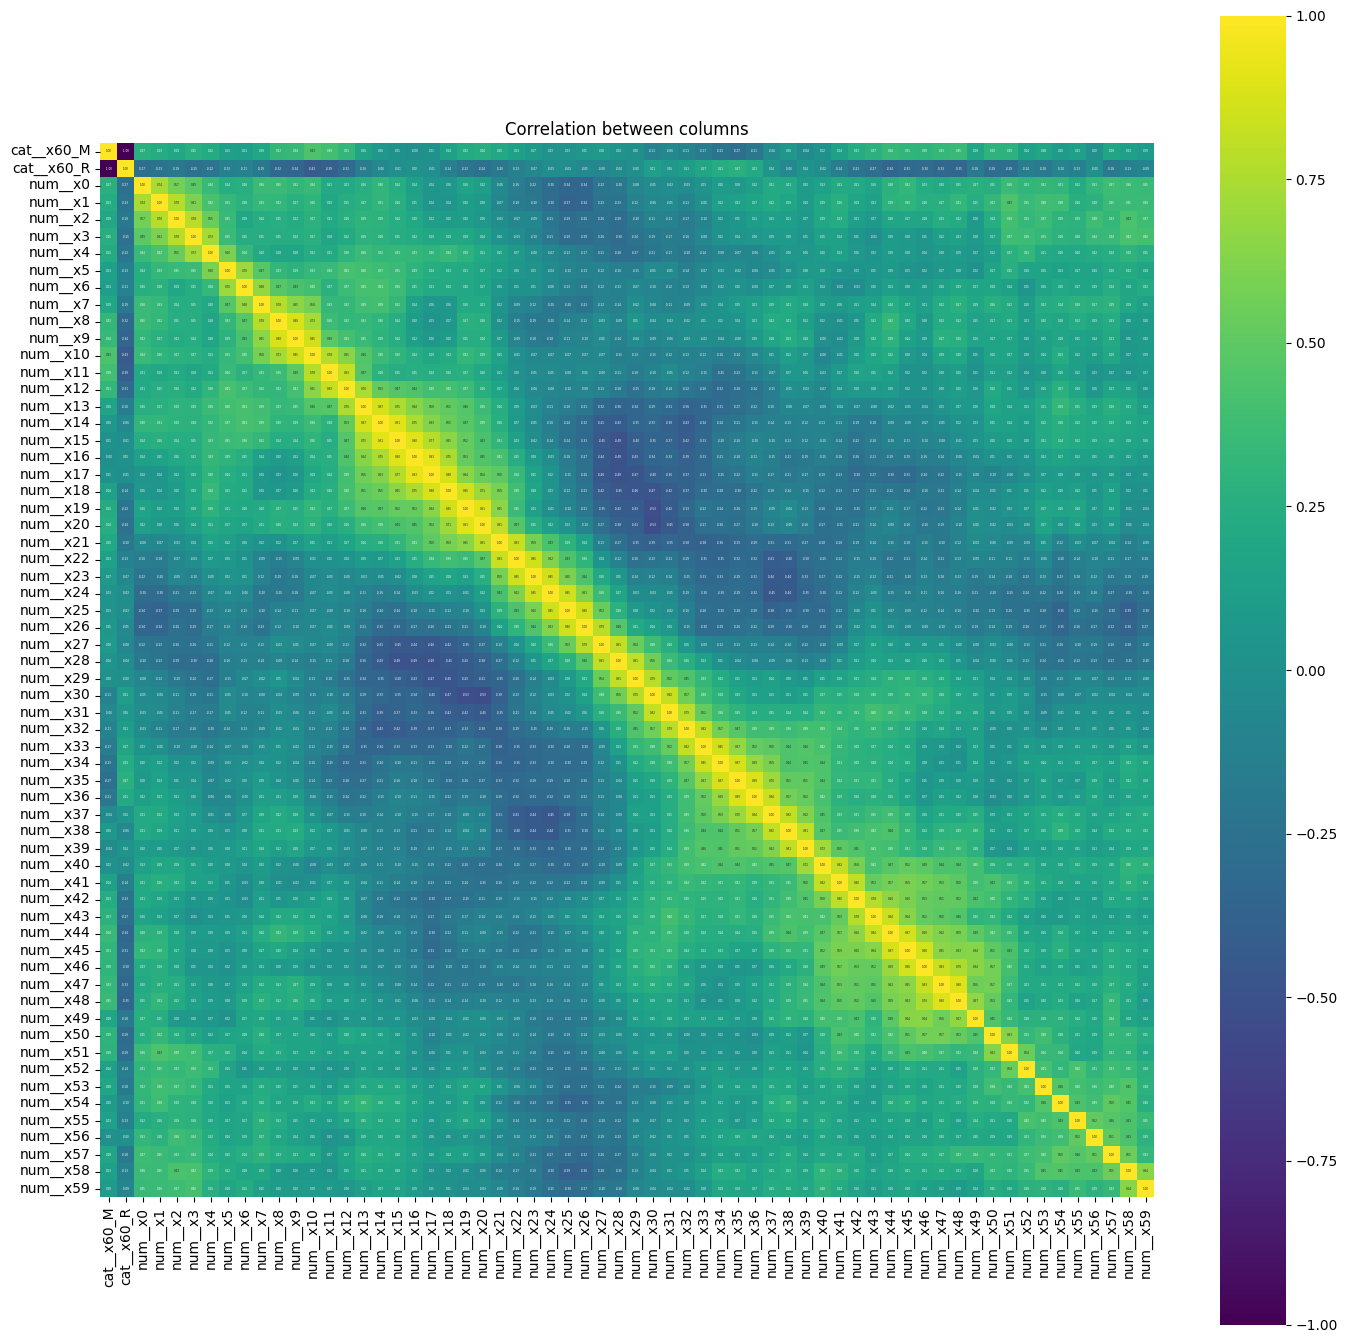

In [11]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_cols = [60]
numeric_cols = list(range(0,60))
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(sparse_output=False), categorical_cols),
        ("num", "passthrough", numeric_cols)
    ]
)

transformed_data = preprocessor.fit_transform(sonar_dataset)
encoded_df = pd.DataFrame(transformed_data, columns=preprocessor.get_feature_names_out())

corr = encoded_df.corr()
fig=plt.figure(figsize=(17 ,17))
ax=sns.heatmap(corr,vmax=1,vmin=-1,square=True,cmap='viridis',annot=True,fmt=".2f",annot_kws={"size": 2})
plt.title('Correlation between columns')
plt.show()

There is an insane number of features, first of all I'm getting rid of some of them, that will simplify the job.


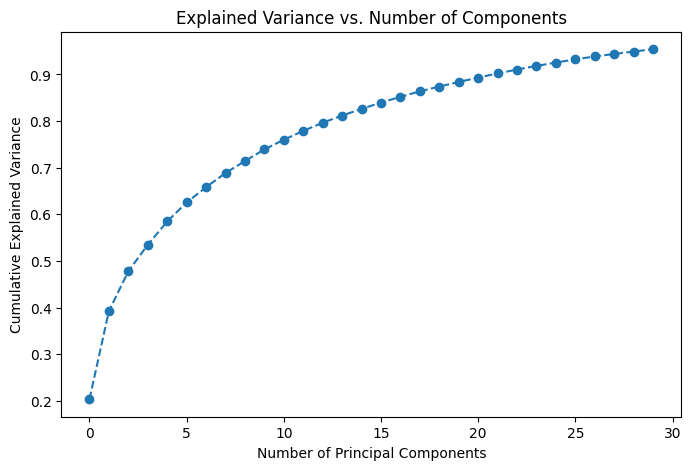

In [23]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) #Remember that we defined X before, we have all the numeric features here
pca = PCA(n_components=30)
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(explained_variance), marker='o', linestyle='--')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance vs. Number of Components")
plt.show()

It seems we can use 30 features for our model

In [24]:
pca = PCA(n_components=30)
X_pca = pca.fit_transform(X_scaled)

In [30]:
new_X = pd.DataFrame.from_records(X_pca)
new_dataframe = pd.concat([new_X, Y], axis=1)

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,60
0,1.921168,-1.370893,-1.666476,0.837913,1.057324,1.712504,-1.785716,1.581264,-0.335418,-1.028065,...,0.723202,0.304876,0.120470,0.458567,-0.021847,-1.089710,-0.096606,-0.168123,0.753434,R
1,-0.480125,7.586388,-1.275734,3.859346,-2.121112,-2.186818,1.742764,-1.517061,-0.307933,-1.341882,...,0.021429,-0.145524,-0.246021,-0.117770,0.704112,-0.052387,0.240064,0.178744,0.554605,R
2,3.859228,6.439860,-0.030635,5.454599,-1.552060,1.181619,1.820138,1.495929,1.152459,-1.006030,...,-2.000942,-0.295682,1.931963,-0.758036,-0.113901,0.964319,-0.214707,-0.527529,0.033003,R
3,4.597419,-3.104089,-1.785344,-1.115908,2.785528,-2.072673,-2.084530,-1.707289,-0.452390,-1.117318,...,1.307367,-0.662918,1.142591,0.352601,-0.491193,-0.061186,-0.150725,-1.389191,-0.642030,R
4,-0.533868,1.849847,-0.860097,3.302076,-2.808954,-0.783945,-0.362657,-0.812621,-0.184578,-0.023594,...,0.258970,0.253982,1.199262,0.165722,-0.041342,-0.589311,0.500720,1.549835,0.783667,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,-1.207653,-0.968174,3.116148,-0.212490,-2.306835,1.151569,-0.010206,1.606494,-0.587992,-2.089473,...,1.502574,0.998375,0.354848,-0.574440,-0.227370,0.018024,0.263487,0.519127,0.412860,M
204,-2.971439,-2.753492,2.500966,0.478754,-2.157206,0.928558,0.738412,0.105210,0.748383,-0.255461,...,0.813577,1.199087,-0.072821,0.067014,0.266986,-0.546090,0.196071,0.556452,-0.053306,M
205,-2.293210,-2.755446,2.388467,0.130616,-2.759021,1.049497,0.449578,1.619202,-0.317789,-0.394252,...,0.455209,-0.579867,0.694111,0.110719,-0.540177,-0.159715,0.063610,0.197417,0.694913,M
206,-3.114464,-1.850550,2.420486,0.382211,-1.658317,0.917819,-1.078272,0.364099,-0.536476,0.457437,...,0.819959,0.889204,0.788375,-1.382816,-0.383245,0.233065,-0.082651,-0.299606,-0.404302,M


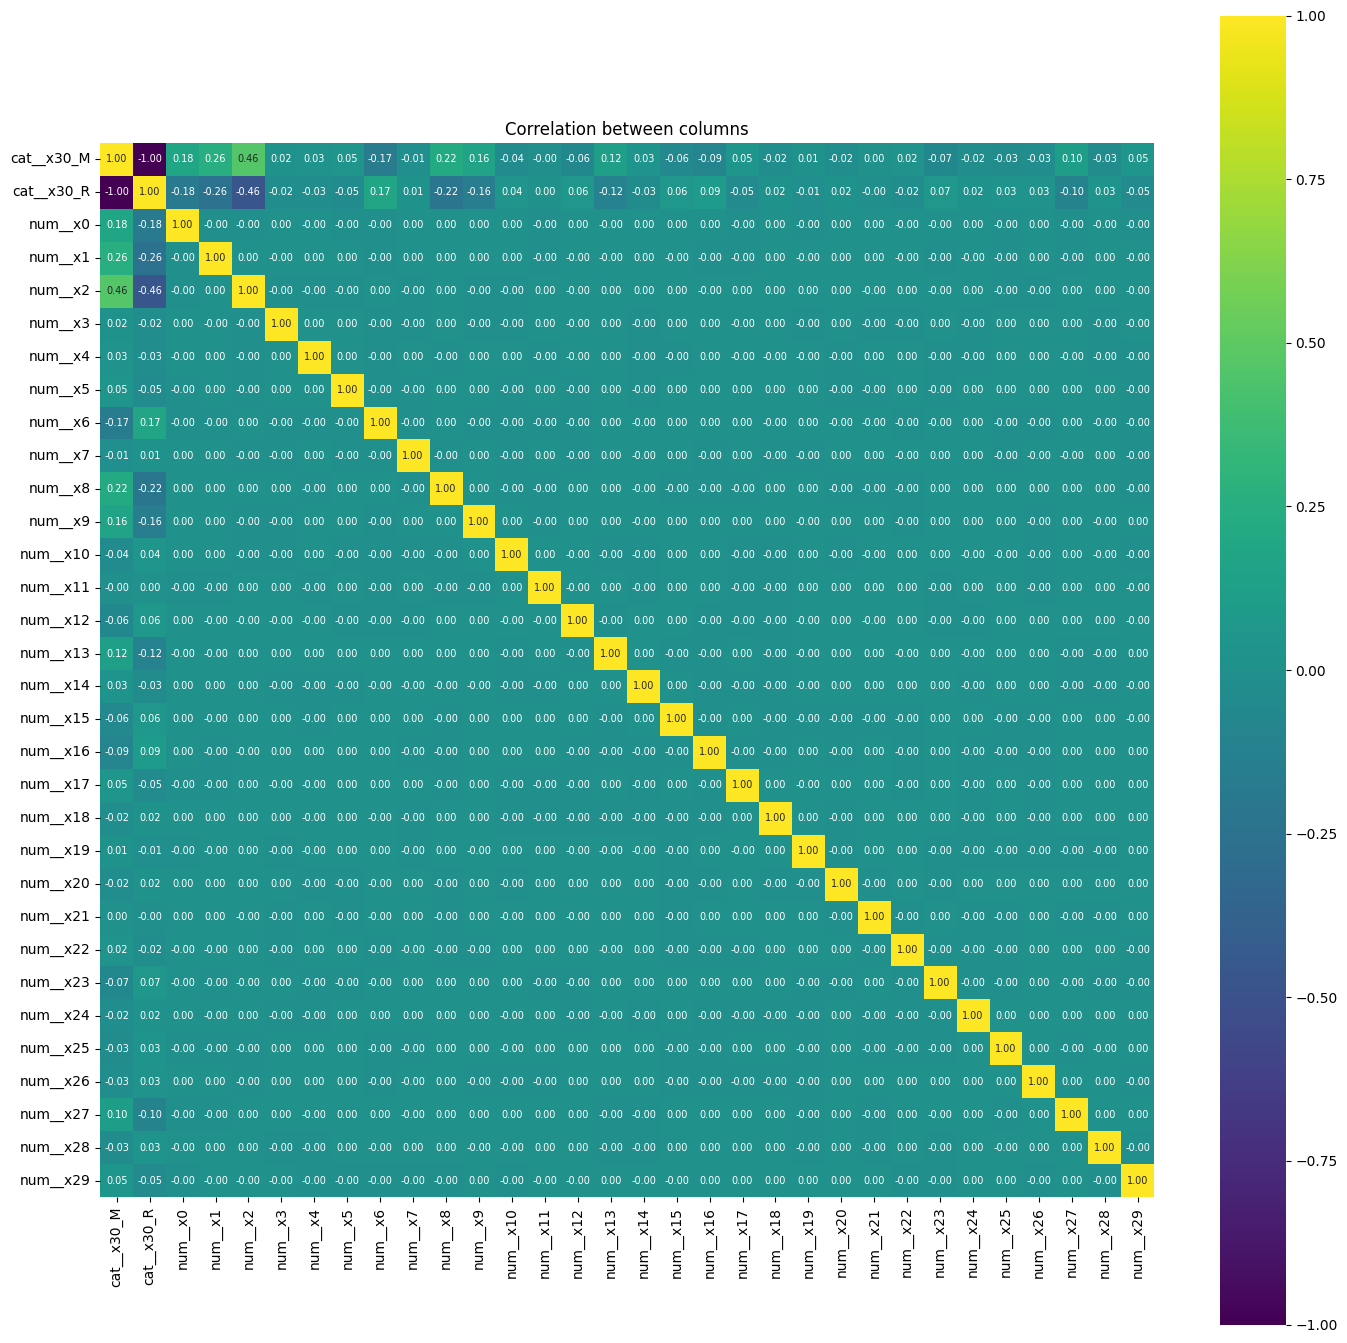

In [33]:
categorical_cols = [30]
numeric_cols = list(range(0,30))
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(sparse_output=False), categorical_cols),
        ("num", "passthrough", numeric_cols)
    ]
)

transformed_data = preprocessor.fit_transform(new_dataframe)
encoded_df = pd.DataFrame(transformed_data, columns=preprocessor.get_feature_names_out())

corr = encoded_df.corr()
fig=plt.figure(figsize=(17 ,17))
ax=sns.heatmap(corr,vmax=1,vmin=-1,square=True,cmap='viridis',annot=True,fmt=".2f",annot_kws={"size": 7})
plt.title('Correlation between columns')
plt.show()

In [37]:
X = new_dataframe.drop(columns=60, axis=1)
Y = new_dataframe[60]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, stratify=Y, random_state=0)
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [38]:
# Now we're evaluating the score of our model
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on training data: {:.2%}'.format(training_data_accuracy))

Accuracy on training data: 88.24%
